In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("student_depression_dataset.csv")

In [7]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [10]:
for col in df.columns:
    print(f"{col} unique values:\n{df[col].unique()}\n")

id unique values:
[     2      8     26 ... 140689 140690 140699]

Gender unique values:
['Male' 'Female']

Age unique values:
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]

City unique values:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Profession unique values:
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'La

- City has invalid values ['M.Tech', "'Less Delhi'", 'City', '3.0', "'Less than 5 Kalyan'", 'ME', 'M.Com']

- Sleep_duration has invalid value(s) ['Others']

- Dietary Habits has invalid value(s) ['Others']

- Degree has invalid value(s) ['Others']

- Financial Stress has invalid value(s) ['?'], Financial stress also needs to be integer column instead of Object type.

In [19]:
def show_invalid_entries(df, column, invalid_list, after=False):
    invalid_entries = df[df[column].isin(invalid_list)]
    if after:
        print(f"After cleaning — number of invalid {column} entries: {len(invalid_entries)}")
    else:
        print(f"Number of invalid {column} entries: {len(invalid_entries)}")
    print(invalid_entries[column].value_counts())

In [16]:
invalid_cities = ['M.Tech', "'Less Delhi'", 'City', '3.0', "'Less than 5 Kalyan'", 'ME', 'M.Com']

show_invalid_entries(df, 'City', invalid_cities)

Number of invalid City entries: 8
City
City                    2
M.Tech                  1
'Less Delhi'            1
3.0                     1
'Less than 5 Kalyan'    1
ME                      1
M.Com                   1
Name: count, dtype: int64





#### invalid cities has unnecessary quotes

In [18]:
invalid_cities_cleaned = [city.strip("'") for city in invalid_cities]

In [20]:
invalid_cities_cleaned

['M.Tech', 'Less Delhi', 'City', '3.0', 'Less than 5 Kalyan', 'ME', 'M.Com']

In [22]:
mode_city = df[~df['City'].isin(invalid_cities_cleaned)]['City'].mode().iloc[0]
df['City'] = df['City'].apply(lambda x: mode_city if x in invalid_cities_cleaned else x)

df['City'] = df['City'].replace("'Less Delhi'", 'Delhi')
df['City'] = df['City'].replace("'Less than 5 Kalyan'", 'Kalyan')

In [40]:
show_invalid_entries(df, 'City', invalid_cities, after = True)

After cleaning — number of invalid City entries: 0
Series([], Name: count, dtype: int64)


In [26]:
invalid_sleep_list = ['Others']
show_invalid_entries(df, "Sleep Duration", invalid_sleep_list)

Number of invalid Sleep Duration entries: 18
Sleep Duration
Others    18
Name: count, dtype: int64


In [28]:
mode_sleep = df[df['Sleep Duration'] != 'Others']['Sleep Duration'].mode().iloc[0]
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', mode_sleep)

In [38]:
show_invalid_entries(df, "Sleep Duration", invalid_sleep_list, after=True)

After cleaning — number of invalid Sleep Duration entries: 0
Series([], Name: count, dtype: int64)


In [32]:
invalid_diet_list = ['Others']
show_invalid_entries(df, "Dietary Habits", invalid_diet_list)

Number of invalid Dietary Habits entries: 12
Dietary Habits
Others    12
Name: count, dtype: int64


In [34]:
mode_sleep = df[df['Dietary Habits'] != 'Others']['Dietary Habits'].mode().iloc[0]
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', mode_sleep)

In [42]:
show_invalid_entries(df, "Dietary Habits", invalid_diet_list, after=True)

After cleaning — number of invalid Dietary Habits entries: 0
Series([], Name: count, dtype: int64)


In [44]:
invalid_degree_list = ['Others']
show_invalid_entries(df, "Degree", invalid_degree_list)

Number of invalid Degree entries: 35
Degree
Others    35
Name: count, dtype: int64


In [46]:
mode_sleep = df[df['Degree'] != 'Others']['Degree'].mode().iloc[0]
df['Degree'] = df['Degree'].replace('Others', mode_sleep)

In [48]:
show_invalid_entries(df, "Degree", invalid_degree_list, after=True)

After cleaning — number of invalid Degree entries: 0
Series([], Name: count, dtype: int64)


In [50]:
invalid_financial_list = ['?']
show_invalid_entries(df, "Financial Stress", invalid_financial_list)

Number of invalid Financial Stress entries: 3
Financial Stress
?    3
Name: count, dtype: int64


In [52]:
mode_Financial = df[df['Financial Stress'] != 'Others']['Financial Stress'].mode().iloc[0]
# Replace 'Other' with the mode value
df['Financial Stress'] = df['Financial Stress'].replace('?', mode_Financial)

In [54]:
show_invalid_entries(df, "Financial Stress", invalid_financial_list, after=True)

After cleaning — number of invalid Financial Stress entries: 0
Series([], Name: count, dtype: int64)


## state column organization

In [2]:
import pandas as pd

# Loading cleaned dataset
df = pd.read_csv("clean_file.csv")  # make sure the file is in the same folder as your notebook

# Quick check
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0


In [4]:
# Mapping of valid cities to their respective Indian states
city_to_state = {
    'Agra': 'Uttar Pradesh',
    'Ahmedabad': 'Gujarat',
    'Bangalore': 'Karnataka',
    'Bhopal': 'Madhya Pradesh',
    'Chennai': 'Tamil Nadu',
    'Delhi': 'Delhi',
    'Faridabad': 'Haryana',
    'Ghaziabad': 'Uttar Pradesh',
    'Hyderabad': 'Telangana',
    'Indore': 'Madhya Pradesh',
    'Jaipur': 'Rajasthan',
    'Kalyan': 'Maharashtra',
    'Kanpur': 'Uttar Pradesh',
    'Kolkata': 'West Bengal',
    'Lucknow': 'Uttar Pradesh',
    'Ludhiana': 'Punjab',
    'Meerut': 'Uttar Pradesh',
    'Mumbai': 'Maharashtra',
    'Nagpur': 'Maharashtra',
    'Nashik': 'Maharashtra',
    'Patna': 'Bihar',
    'Pune': 'Maharashtra',
    'Rajkot': 'Gujarat',
    'Srinagar': 'Jammu and Kashmir',
    'Surat': 'Gujarat',
    'Thane': 'Maharashtra',
    'Vadodara': 'Gujarat',
    'Varanasi': 'Uttar Pradesh',
    'Vasai-Virar': 'Maharashtra',
    'Visakhapatnam': 'Andhra Pradesh',
}

In [6]:
# Creating a new column using the mapping
df['State'] = df['City'].map(city_to_state)

In [8]:
# Previewing the new State column with the corresponding City
df[['City', 'State']].head(10)

,City,State
0,Visakhapatnam,Andhra Pradesh
1,Bangalore,Karnataka
2,Srinagar,Jammu and Kashmir
3,Varanasi,Uttar Pradesh
4,Jaipur,Rajasthan
5,Pune,Maharashtra
6,Thane,Maharashtra
7,Chennai,Tamil Nadu
8,Nagpur,Maharashtra
9,Nashik,Maharashtra


In [10]:
# Filling missing state values with 'Unknown' if any cities were not mapped
df['State'] = df['State'].fillna('Unknown')

In [15]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,State
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1,Andhra Pradesh
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0,Karnataka
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0,Jammu and Kashmir
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5,Yes,1,Uttar Pradesh
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0,Rajasthan


In [17]:
df['State'].unique()

array(['Andhra Pradesh', 'Karnataka', 'Jammu and Kashmir',
       'Uttar Pradesh', 'Rajasthan', 'Maharashtra', 'Tamil Nadu',
       'Gujarat', 'West Bengal', 'Madhya Pradesh', 'Punjab', 'Telangana',
       'Bihar', 'Haryana', 'Delhi', 'Unknown'], dtype=object)

In [27]:
import matplotlib.pyplot as plt

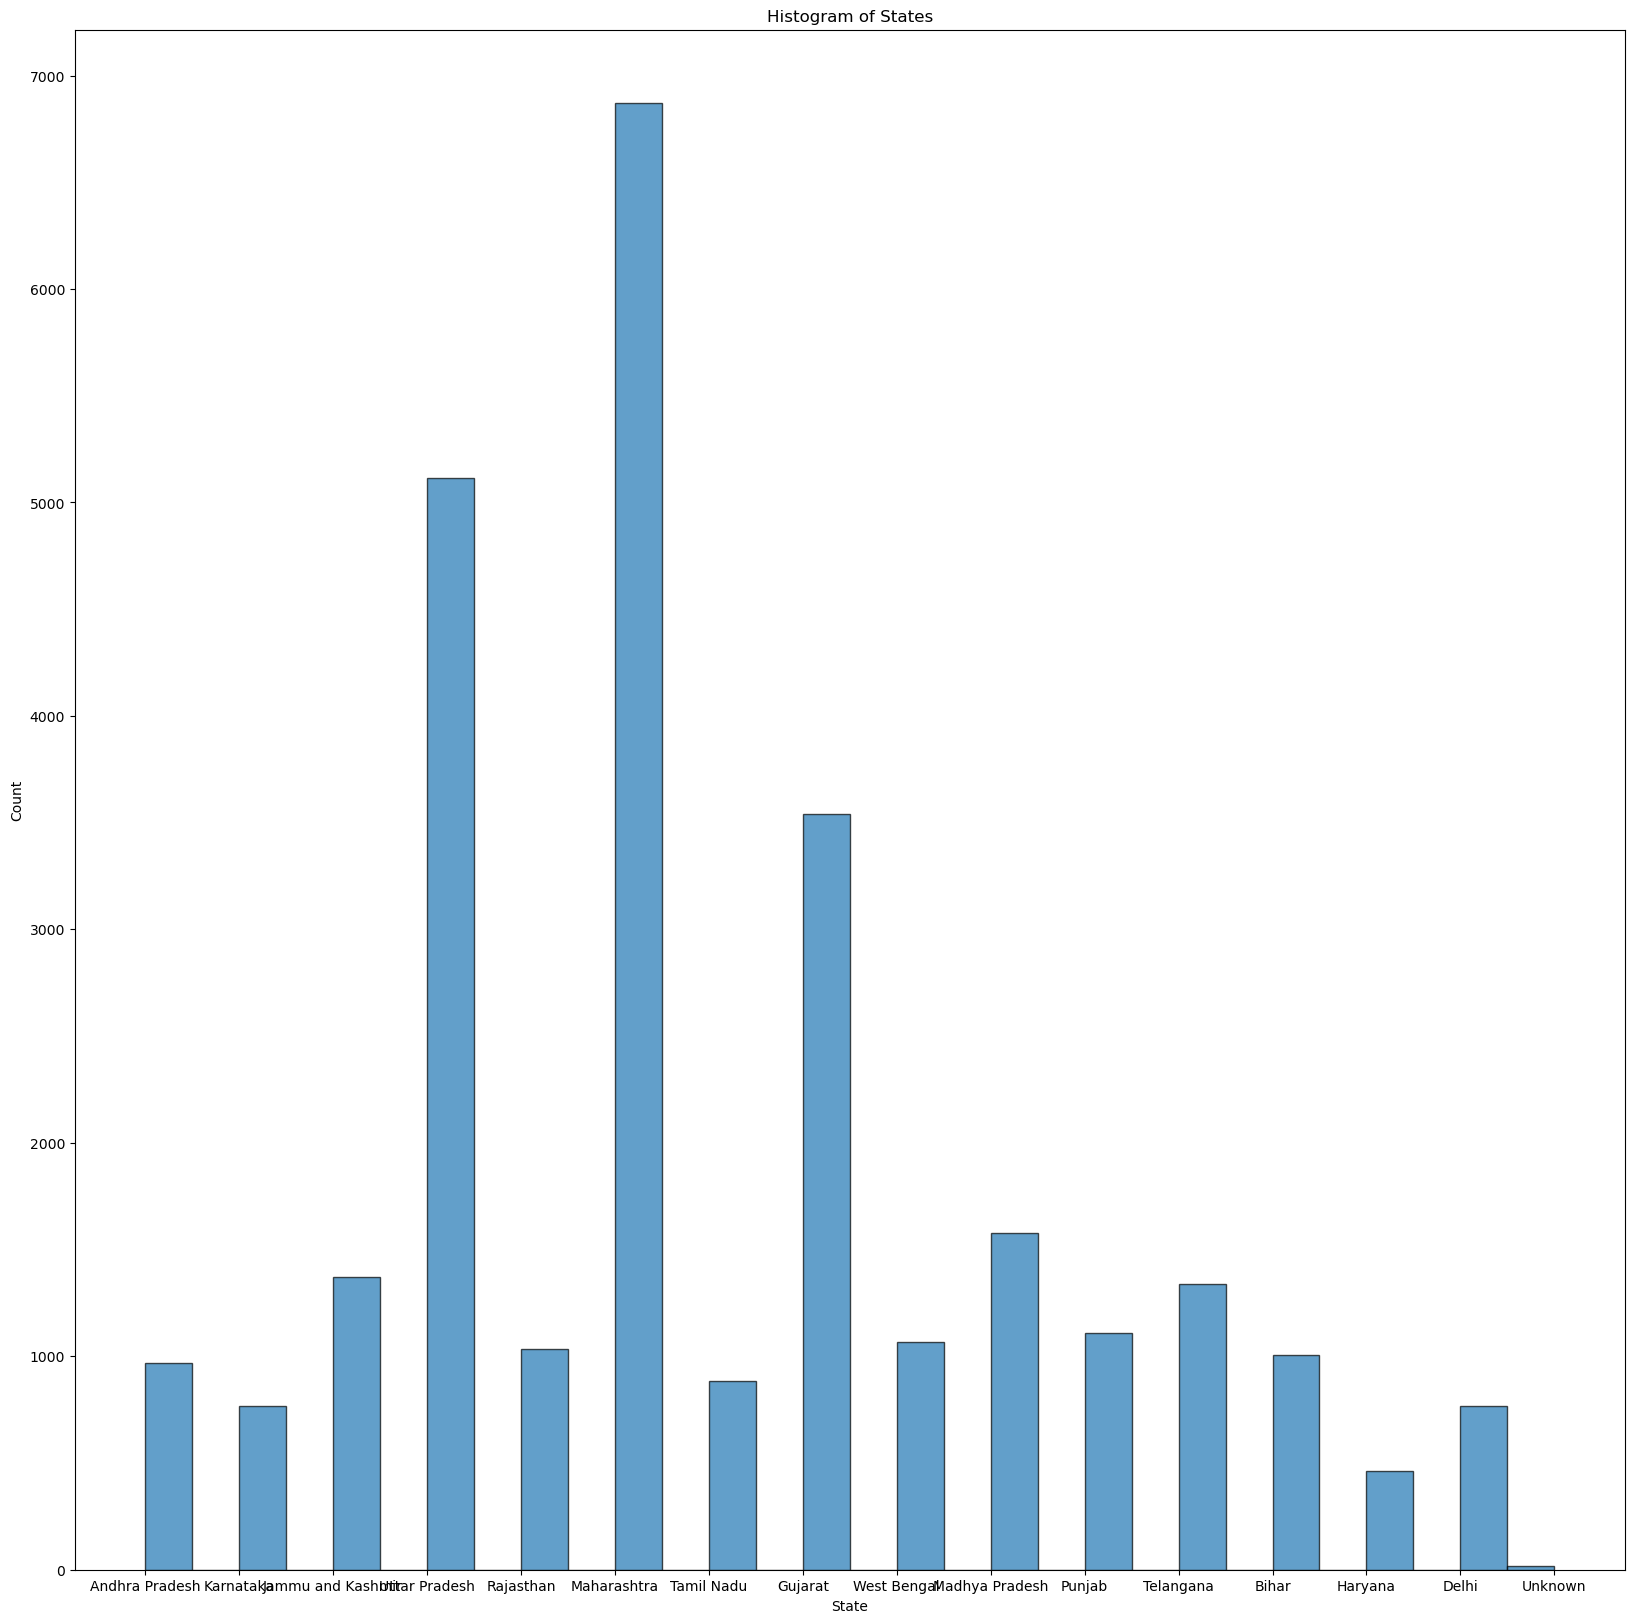

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.hist(df['State'].dropna(),        # dropna() if you want to ignore NaNs
         bins=30,                  # number of bins (adjust as needed)
         edgecolor='black',       # makes bar edges visible
         alpha=0.7)               # transparency
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Histogram of States')
plt.show()

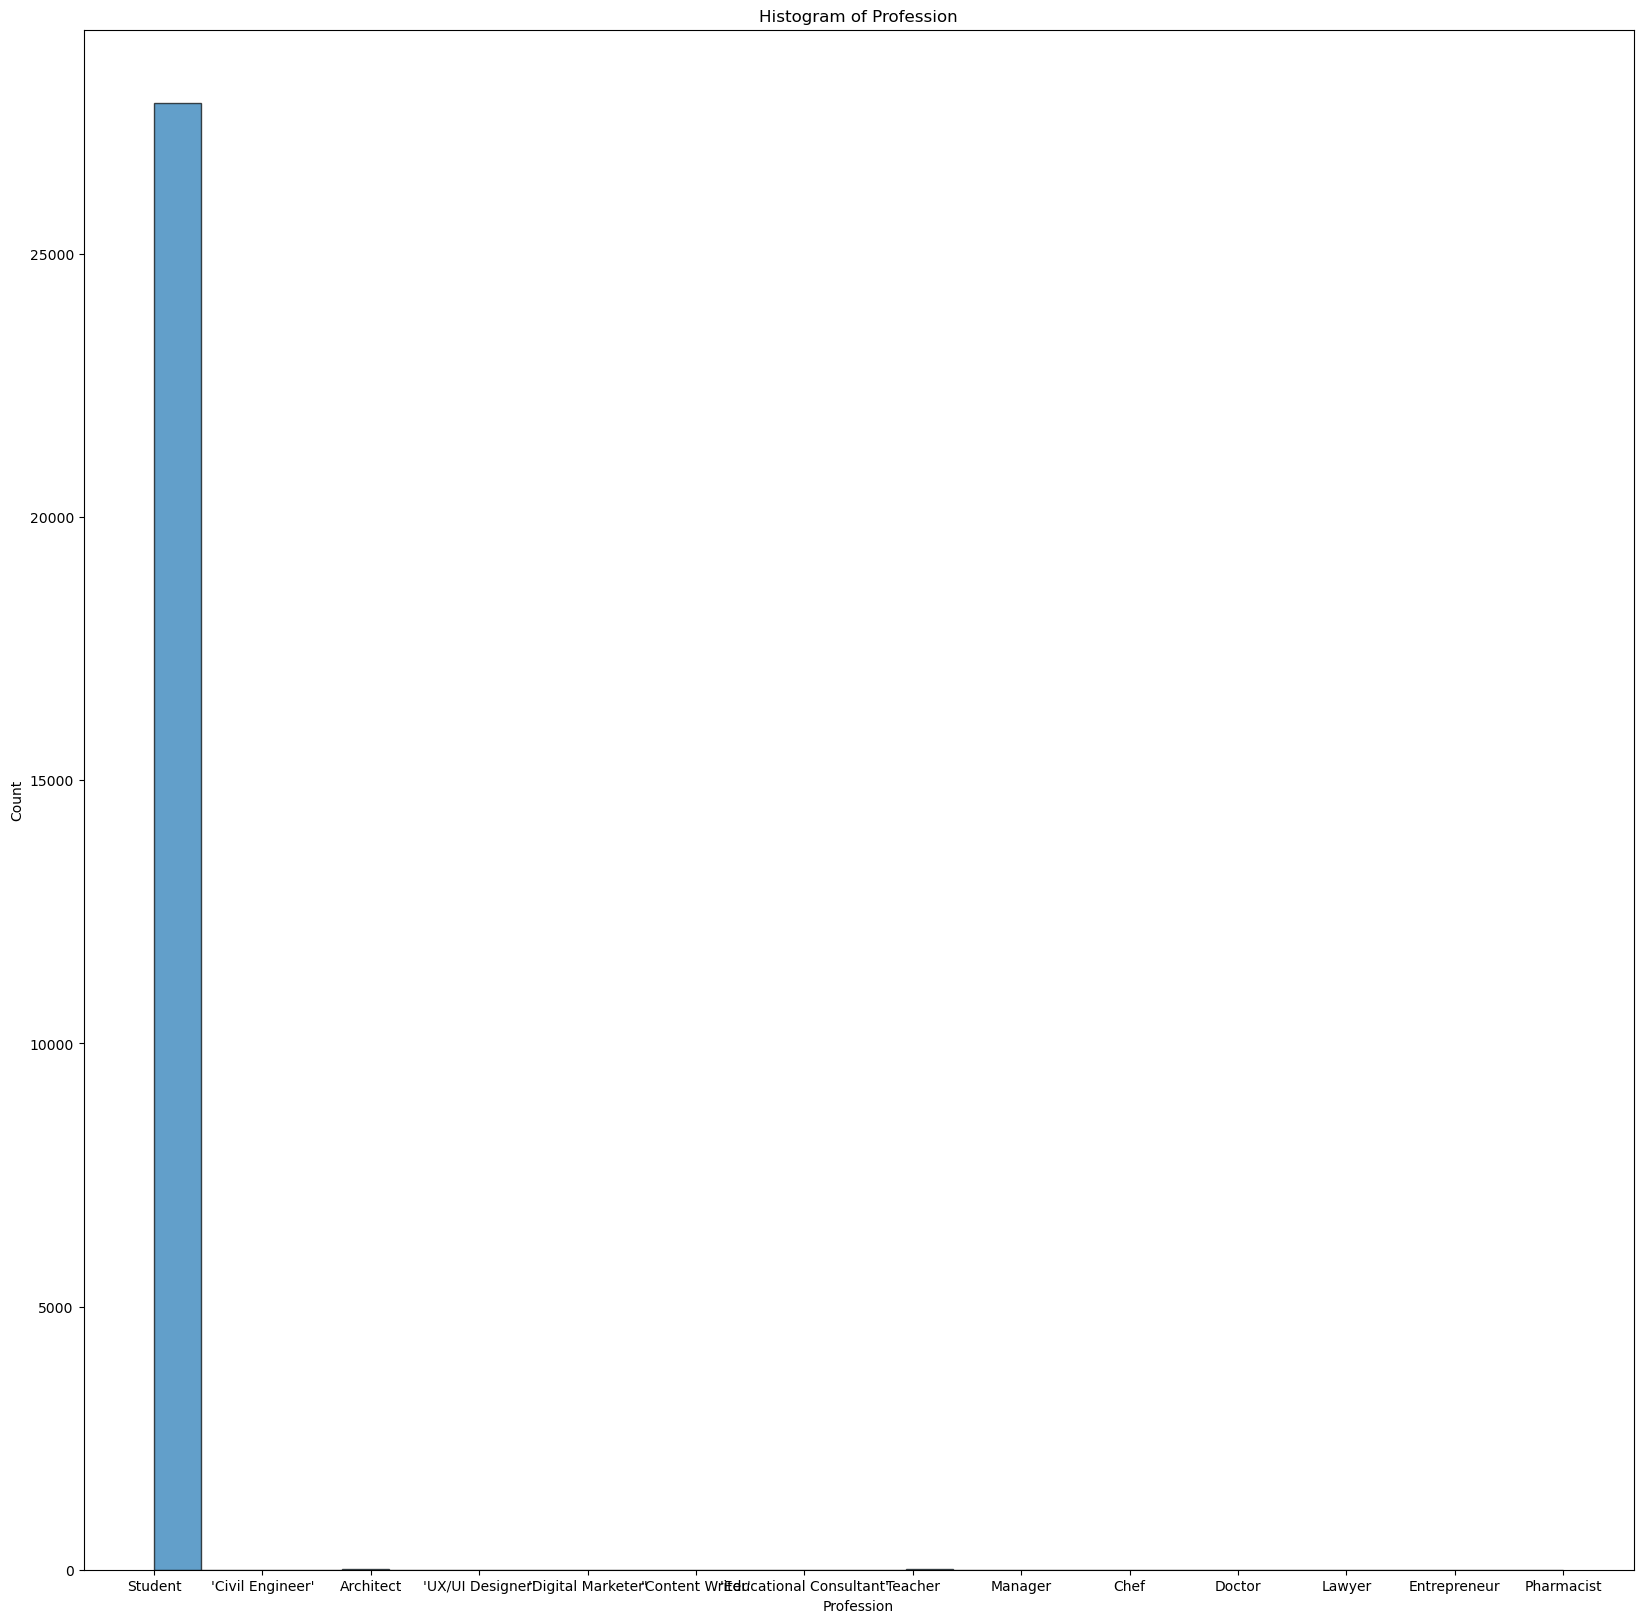

In [35]:

plt.figure(figsize=(20, 20))
plt.hist(df['Profession'].dropna(),        # dropna() if you want to ignore NaNs
         bins=30,                  # number of bins (adjust as needed)
         edgecolor='black',       # makes bar edges visible
         alpha=0.7)               # transparency
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Histogram of Profession')
plt.show()

In [39]:
df['Profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [47]:
counts = df.groupby('Profession').size()
print(counts)

Profession
'Civil Engineer'                1
'Content Writer'                2
'Digital Marketer'              3
'Educational Consultant'        1
'UX/UI Designer'                1
Architect                       8
Chef                            2
Doctor                          2
Entrepreneur                    1
Lawyer                          1
Manager                         1
Pharmacist                      2
Student                     27870
Teacher                         6
dtype: int64


In [51]:
# 1. Identify rows to delete
mask = df['Profession'].str.lower() != 'student'
rows_to_delete = df[mask]


In [57]:
rows_to_delete.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,State
113,609,Male,21.0,Ahmedabad,'Civil Engineer',5.0,0.0,7.83,1.0,0.0,'5-6 hours',Healthy,MSc,Yes,11.0,3,Yes,1,Gujarat
422,2105,Female,31.0,Vadodara,Architect,5.0,0.0,6.95,3.0,0.0,'Less than 5 hours',Moderate,BSc,No,8.0,1,Yes,1,Gujarat
1845,9483,Female,32.0,Kalyan,'UX/UI Designer',3.0,0.0,9.60,2.0,0.0,'7-8 hours',Moderate,PhD,Yes,5.0,3,No,1,Maharashtra
2249,11470,Female,28.0,Ahmedabad,'Digital Marketer',5.0,0.0,9.72,3.0,0.0,'More than 8 hours',Healthy,MA,Yes,10.0,5,Yes,1,Gujarat
2440,12425,Male,25.0,Kalyan,'Content Writer',5.0,0.0,8.50,2.0,0.0,'5-6 hours',Moderate,B.Ed,Yes,0.0,2,Yes,1,Maharashtra


In [59]:

# 3. Drop them from the original DataFrame
df.drop(rows_to_delete.index, inplace=True)


In [61]:

# 4. (Optional) Reset index if you want a clean 0…N‑1 index afterwards
df.reset_index(drop=True, inplace=True)

In [63]:
counts = df.groupby('Profession').size()
print(counts)

Profession
Student    27870
dtype: int64


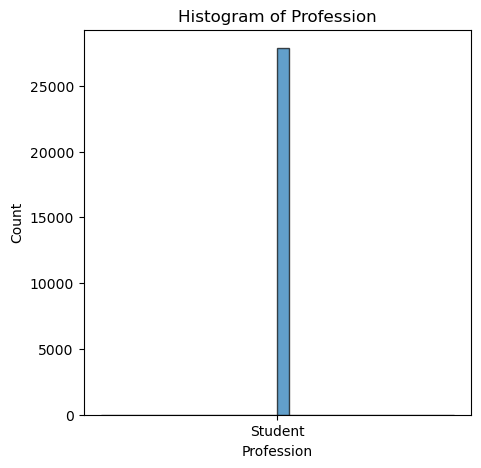

In [67]:

plt.figure(figsize=(5, 5))
plt.hist(df['Profession'].dropna(),        # dropna() if you want to ignore NaNs
         bins=30,                  # number of bins (adjust as needed)
         edgecolor='black',       # makes bar edges visible
         alpha=0.7)               # transparency
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Histogram of Profession')
plt.show()

In [69]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,State
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1,Andhra Pradesh
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0,Karnataka
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0,Jammu and Kashmir
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5,Yes,1,Uttar Pradesh
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0,Rajasthan


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27870 entries, 0 to 27869
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27870 non-null  int64  
 1   Gender                                 27870 non-null  object 
 2   Age                                    27870 non-null  float64
 3   City                                   27870 non-null  object 
 4   Profession                             27870 non-null  object 
 5   Academic Pressure                      27870 non-null  float64
 6   Work Pressure                          27870 non-null  float64
 7   CGPA                                   27870 non-null  float64
 8   Study Satisfaction                     27870 non-null  float64
 9   Job Satisfaction                       27870 non-null  float64
 10  Sleep Duration                         27870 non-null  object 
 11  Di

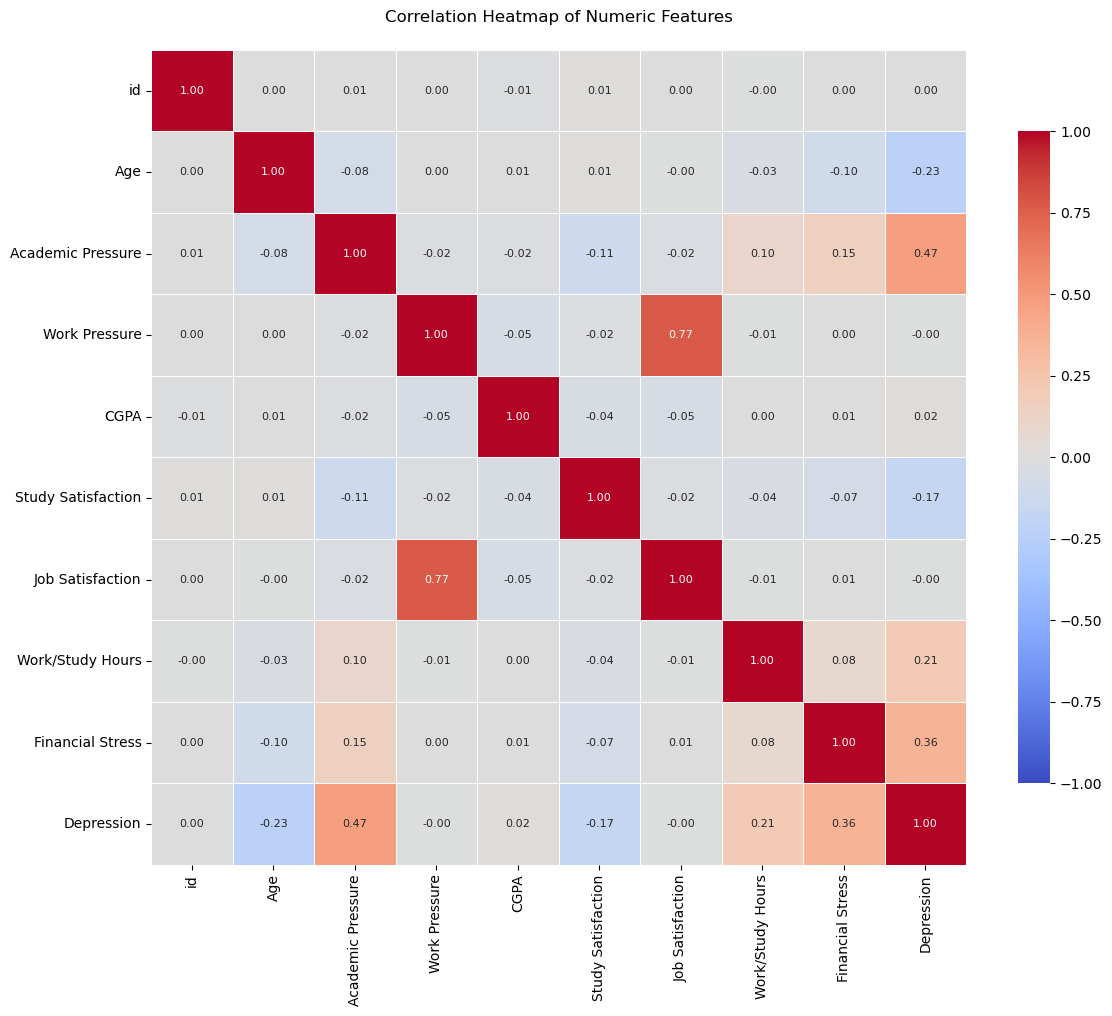

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (1) Load or define your DataFrame:
# For example, if you have a CSV:
# df = pd.read_csv("your_data.csv")

# Here we'll assume 'df' already exists.

# (2) Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# (3) Compute the correlation matrix
corr = numeric_df.corr()

# (4) Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,          # show correlation values in each cell
    fmt=".2f",           # two decimal places
    cmap="coolwarm",     # diverging colormap
    vmin=-1, vmax=1,     # set range from -1 to +1
    linewidths=0.5,      # lines between cells
    linecolor='white',   # color of lines
    square=True,         # square cells
    cbar_kws={"shrink": .8},  # shrink colorbar
    annot_kws={"size":8}      # annotation font size
)
plt.title("Correlation Heatmap of Numeric Features", pad=20)
plt.tight_layout()
plt.show()

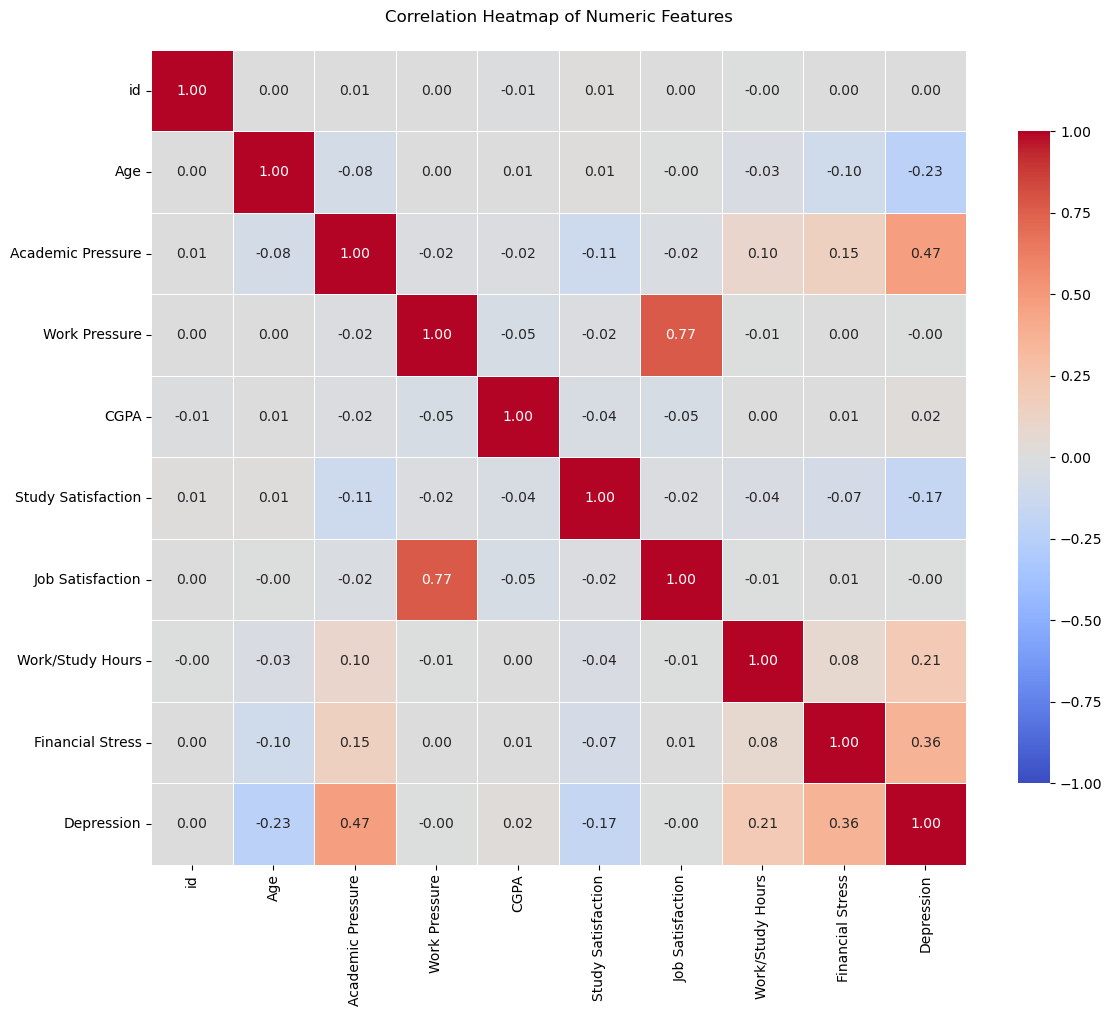

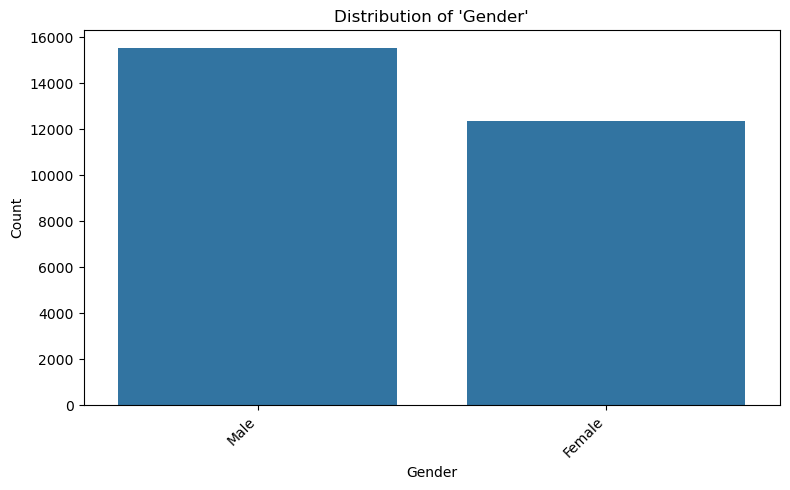

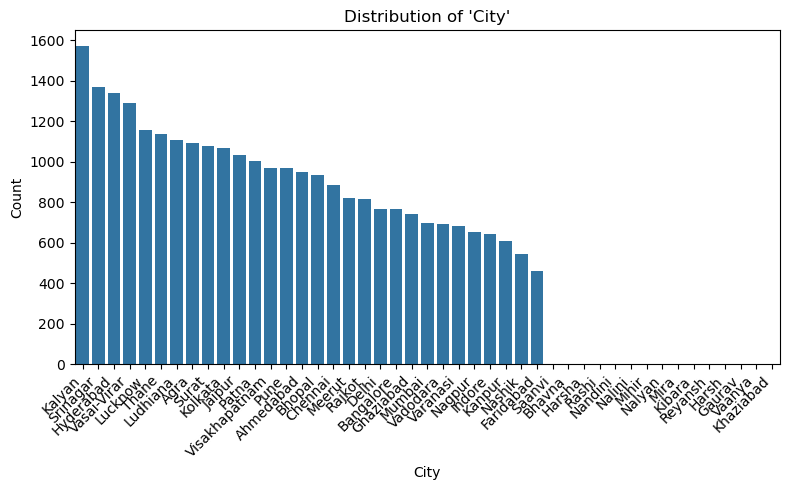

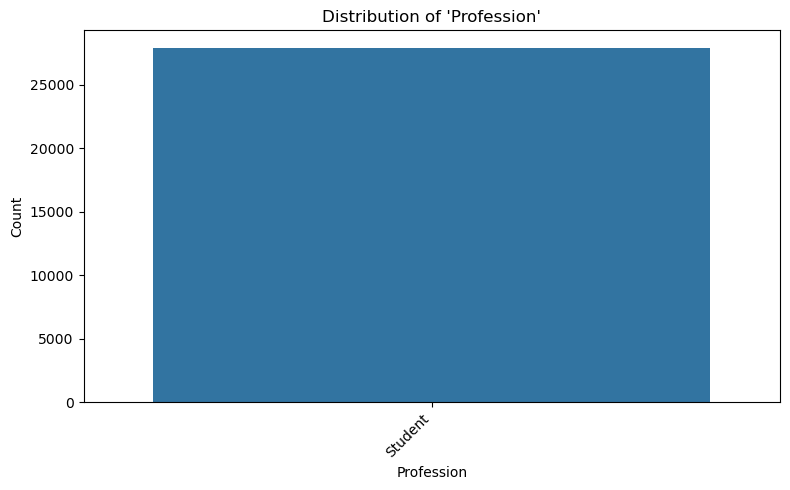

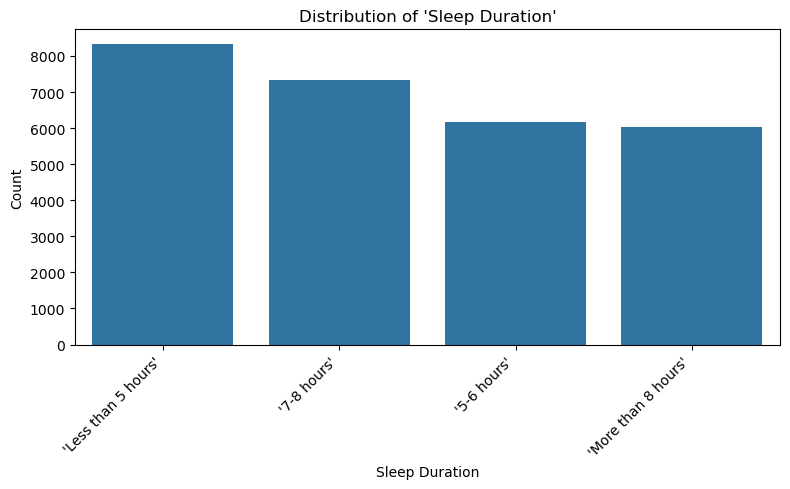

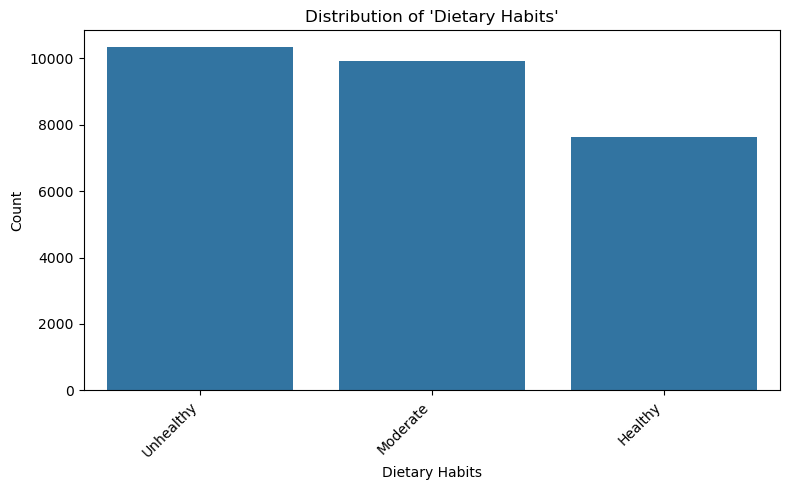

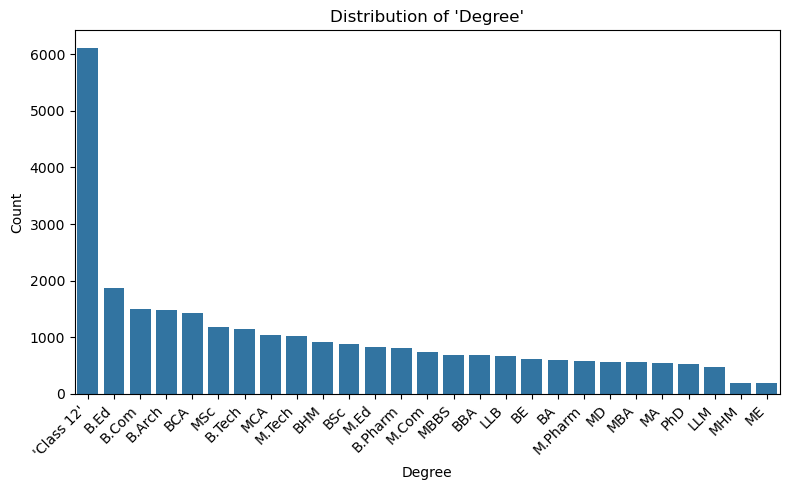

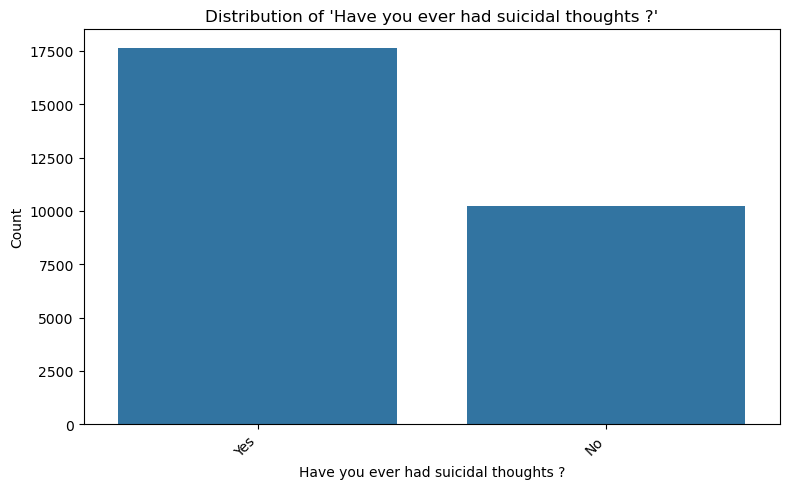

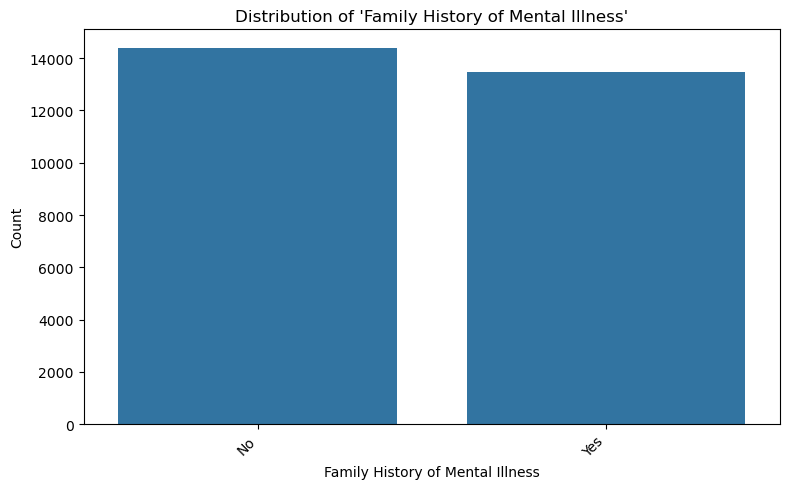

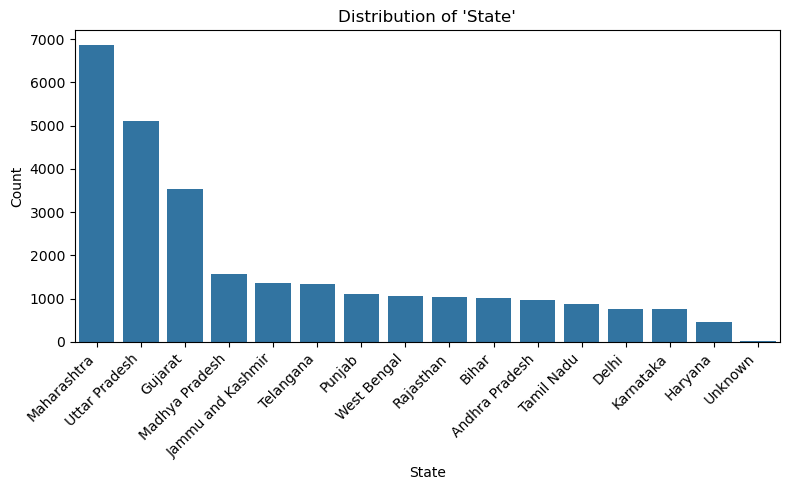

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (1) Load or define your DataFrame
# For example:
# df = pd.read_csv("your_data.csv")

# Here, we assume `df` already exists.

# -----------------------------------
# Part A: Heatmap of numeric columns
# -----------------------------------

# Select only numeric columns (int64 and float64)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,        # show correlation coefficients
    fmt=".2f",         # two decimal places
    cmap="coolwarm",   # diverging colormap
    vmin=-1, vmax=1,   # fix scale
    linewidths=0.5,    # lines between cells
    square=True,
    cbar_kws={"shrink": .8},
)
plt.title("Correlation Heatmap of Numeric Features", pad=20)
plt.tight_layout()
plt.show()


# --------------------------------------------
# Part B: Histogram (countplot) for object cols
# --------------------------------------------

# Identify object‑dtype columns
obj_cols = df.select_dtypes(include=['object']).columns

for col in obj_cols:
    plt.figure(figsize=(8, 5))
    # For categorical text data, a countplot is the histogram equivalent
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of '{col}'")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

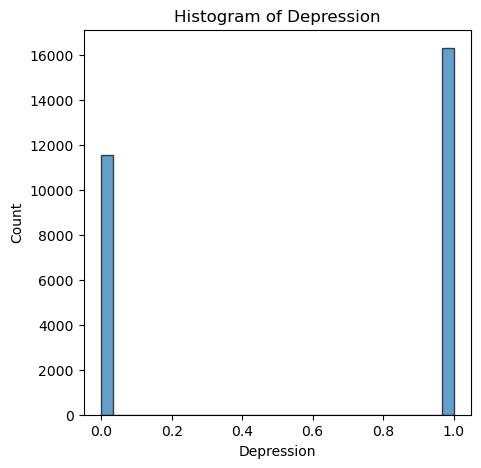

In [85]:
plt.figure(figsize=(5, 5))
plt.hist(df['Depression'].dropna(),        # dropna() if you want to ignore NaNs
         bins=30,                  # number of bins (adjust as needed)
         edgecolor='black',       # makes bar edges visible
         alpha=0.7)               # transparency
plt.xlabel('Depression')
plt.ylabel('Count')
plt.title('Histogram of Depression')
plt.show()